<a href="https://colab.research.google.com/github/HWMV/AIFFEL_Quest1/blob/master/Machine_Learning/Main_quest2/Go_poketmon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Main_quest2. 전설의 몬스터 분류**

## 가랏! 포켓몬

#### 온라인 6기 코어과정 최현우

-목 표-
* 전설몬 분류를 위한 데이터 셋 분석
* 시각화, 피벗테이블 활용 EDA 진행
* 전처리가 필요한 인코딩 진행
* 데이터셋 분리, 베이스 라인과 비교하며 학습

# 1.**데이터 셋 만들기**

In [556]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [557]:
# 데이터 불러오기

url = "https://raw.githubusercontent.com/HWMV/AIFFEL_Quest1/master/Main_quest/Main_quest2/Pokemon.csv"
dataset = pd.read_csv(url)

In [558]:
# 데이터 샘플 확인
dataset.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [559]:
# 원본 데이터 유지(.copy)
poketmon = dataset.copy()
# 800마리 포켓몬과 13개의 피처 확인
poketmon.shape

(800, 13)

In [560]:
# 전설의 포켓몬 여부 확인이 목적 (target = legendary == True) 일반은 False
legendary = poketmon[poketmon["Legendary"]==True].reset_index(drop=True)
# 전설의 포켓몬 65마리 확인
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [561]:
# 일반 포켓몬 확인
ordinary = poketmon[poketmon["Legendary"]==False].reset_index(drop=True)# [[YOUR CODE]]
# 일반몬스터 735마리 확인
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# **2. EDA (데이터 분석/처리)**

In [562]:
# 빈 데이터(결측치) 확인
# Type 2 유형 결측치 확인
# Type 2가 없는 포켓몬이 386마리
poketmon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [563]:
# 전체 컬럼 이해하기
# 큰 데이터셋이 아니므로 하나하나 보자 전체로
# 13개의 컬럼수와 컬럼명 확인
print(len(poketmon.columns))
poketmon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [564]:
# 컬럼 별 type 확인
# bool 1ea, int 9ea, object 3ea 확인
poketmon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [565]:
# '#' 1번쨰 컬럼 몇 종류의 값 확인
# 721개를 가짐, set는 중복 데이터를 가질 수 없으니 800개가 안되서 중복이 있음
len(set(poketmon["#"]))

721

In [566]:
# '#' 같은 값을 가지는 리자몽 확인 (같은 값을 가지는게 6번인지 어떻게 알지?)
poketmon[poketmon["#"]==6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [567]:
# Name 컬럼
# 포켓몬 수와 같다. Name 전부 다른 값 unique
len(set(poketmon["Name"]))

800

In [568]:
# Type1 &Type2 포켓몬 속성 확인
# 무작위 두마리 확인
# Charizard는 속성 2개, Wartortle 1개
poketmon.loc[[6,10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [569]:
# 각 속성의 종류가 몇가지 인지 확인
# Type 1은 18개, 2는 19개 확인
len(list(set(poketmon["Type 1"]))), len(list(set(poketmon["Type 2"])))

(18, 19)

In [570]:
# 다른 타입 1가지 확인 (파이썬 차집합 함수 활용)
# Type 2에 nan 값이 다름 확인
set(poketmon["Type 2"]) - set(poketmon["Type 1"])

{nan}

In [571]:
# Type 변수에 저장, 이거 어디다가 쓰려고 저장했을까? 일반/전설 속성 분포 확인 위함
types = list(set(poketmon["Type 1"]))
# types2 = list(set(poketmon["Type 2"]))
# type 18 ea, type 명 확인
print(len(types))
print(types)

18
['Poison', 'Fire', 'Dark', 'Steel', 'Flying', 'Water', 'Normal', 'Bug', 'Psychic', 'Ground', 'Dragon', 'Grass', 'Electric', 'Fairy', 'Ghost', 'Rock', 'Ice', 'Fighting']


In [572]:
# Type 변수에 저장, 이거 어디다가 쓰려고 저장했을까? 일반/전설 속성 분포 확인 위함
types2 = list(set(poketmon["Type 2"]))
# types2 = list(set(poketmon["Type 2"]))
# type 18 ea, type 명 확인
print(len(types2))
print(types2)

19
['Fire', 'Normal', 'Ground', 'Rock', 'Steel', 'Psychic', 'Grass', 'Electric', 'Ice', 'Water', 'Bug', nan, 'Fairy', 'Ghost', 'Fighting', 'Poison', 'Dark', 'Flying', 'Dragon']


In [573]:
# pandas isna() 함수 활용 (Type 2에 NaN 수 확인)
# 386마리가 NaN 값 확인
poketmon["Type 2"].isna().sum()

386

In [574]:
legendary["Type 1"].head(5)

0         Ice
1    Electric
2        Fire
3     Psychic
4     Psychic
Name: Type 1, dtype: object

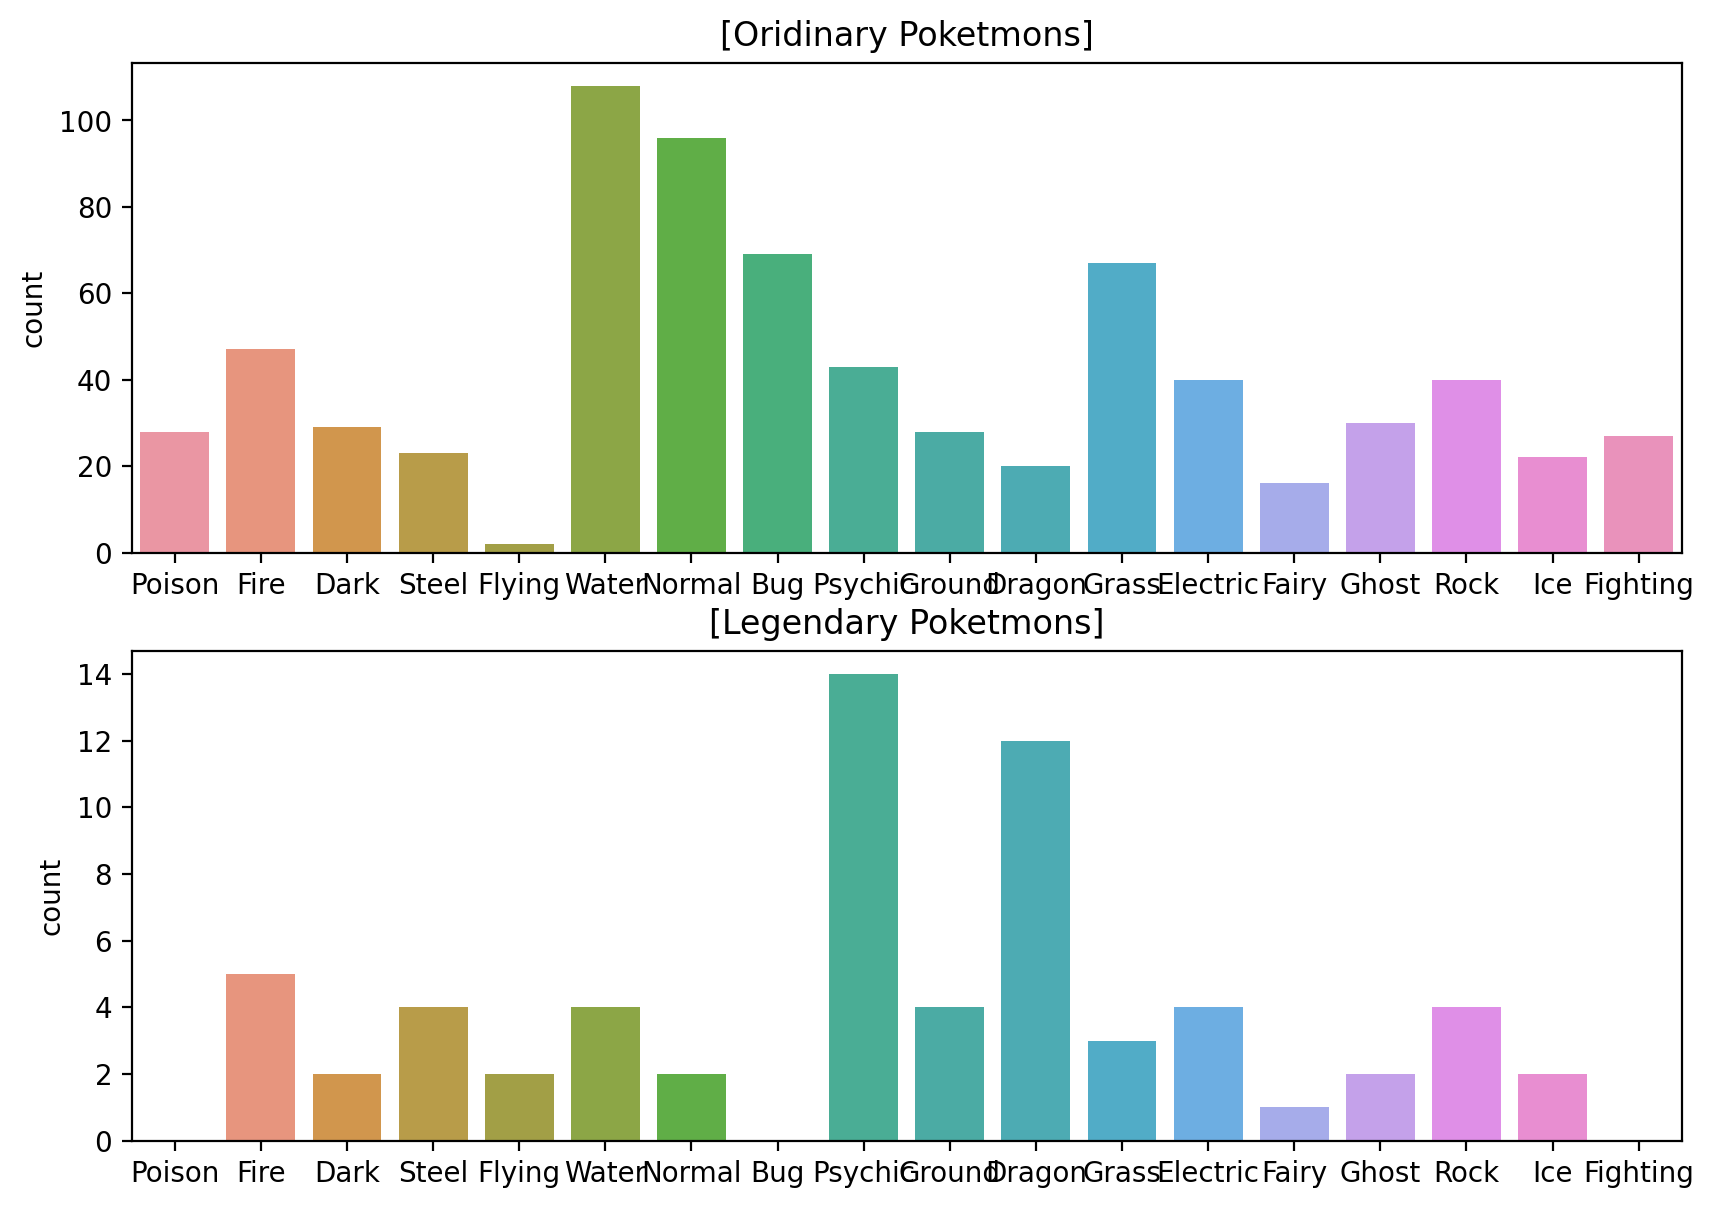

In [575]:
# Type 1 데이터 분포 plot
# 일반, 전설 시각화 : 일반, 전설 포켓몬의 속성 분포 확인을 위함
plt.figure(figsize=(10,7))

# 일반 : 속성을 x축 세팅
plt.subplot(211)      # 211 : nrows = 2, ncols = 1, index = 1
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Oridinary Poketmons]")
# 전설 세팅
plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Poketmons]")

plt.show()

In [576]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(poketmon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


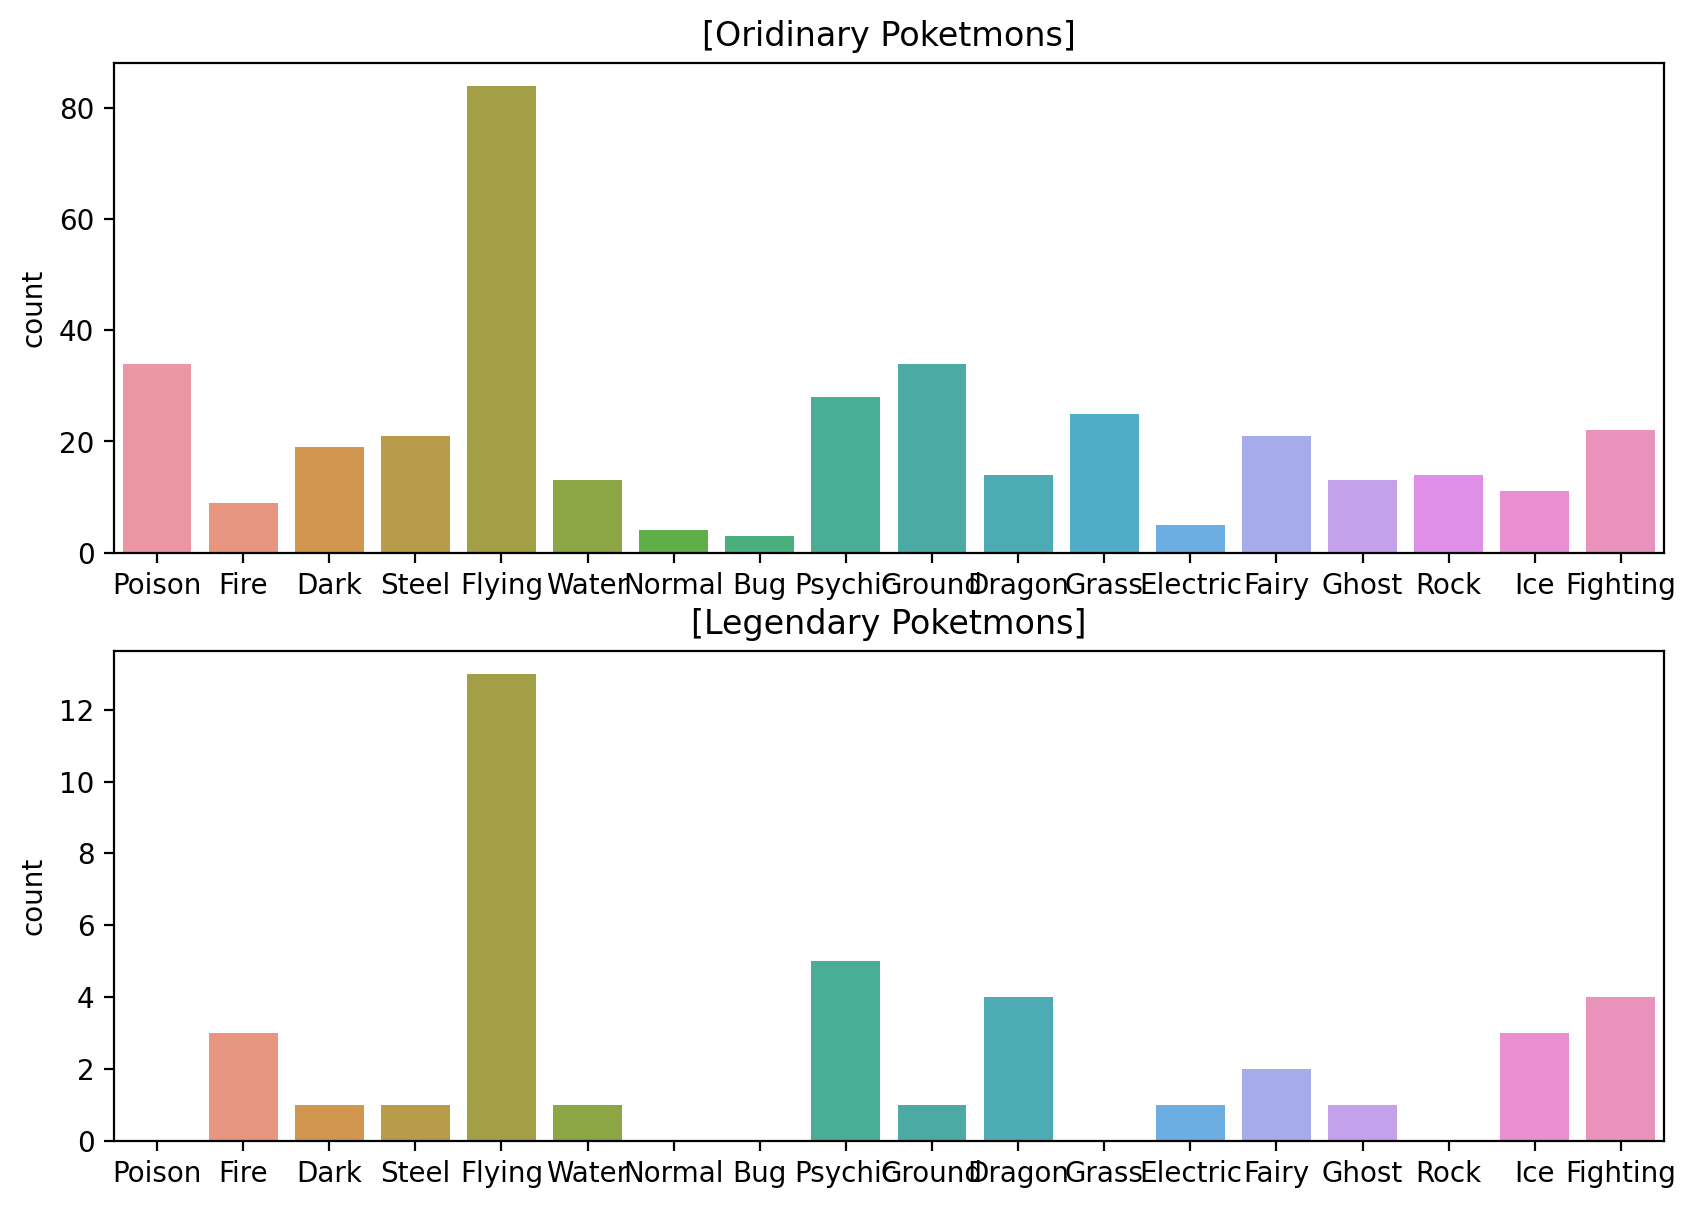

In [577]:
# Type 2 데이터 분포 plot
plt.figure(figsize=(10,7))

# 일반 : 속성을 x축 세팅
plt.subplot(211)      # 211 : nrows = 2, ncols = 1, index = 1
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Oridinary Poketmons]")
# 전설 세팅
plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Poketmons]")

plt.show()

In [578]:
# Type2 별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(poketmon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)
# Type2 컬럼에 NaN 값 어디 갔지? types 변수에 담았으니깐 신경 안써도 됨
# legendary['Type 2'].isna().sum()

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [579]:
# Total : 모든 스탯의 총합
poketmon.head(3) # 스탯 컬럼명 확인 "HP"~"Speed"
stats = ['HP',	'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [580]:
# Total 값 맞는지 첫 번째 몬 검증
print("#0 pokemon: ", poketmon.loc[0, "Name"])
print("total: ", int(poketmon.loc[0, "Total"]))
print("stats: ", list(poketmon.loc[0, stats]))
print("sum of all stats: ", sum(list(poketmon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [581]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.
# stats 피처들을 열 별로 더 하는 변수
sum_stats = poketmon[stats].sum(axis=1).values
# total 값과 더한 총합이 같은지 변수
equal_total = sum_stats == poketmon['Total'].values
# 같은 포켓몬이 몇 마리인지 카운트
# 800 마리 모두 Total 과 스탯컬럼합 이 같음 확인
np.sum(equal_total)


800

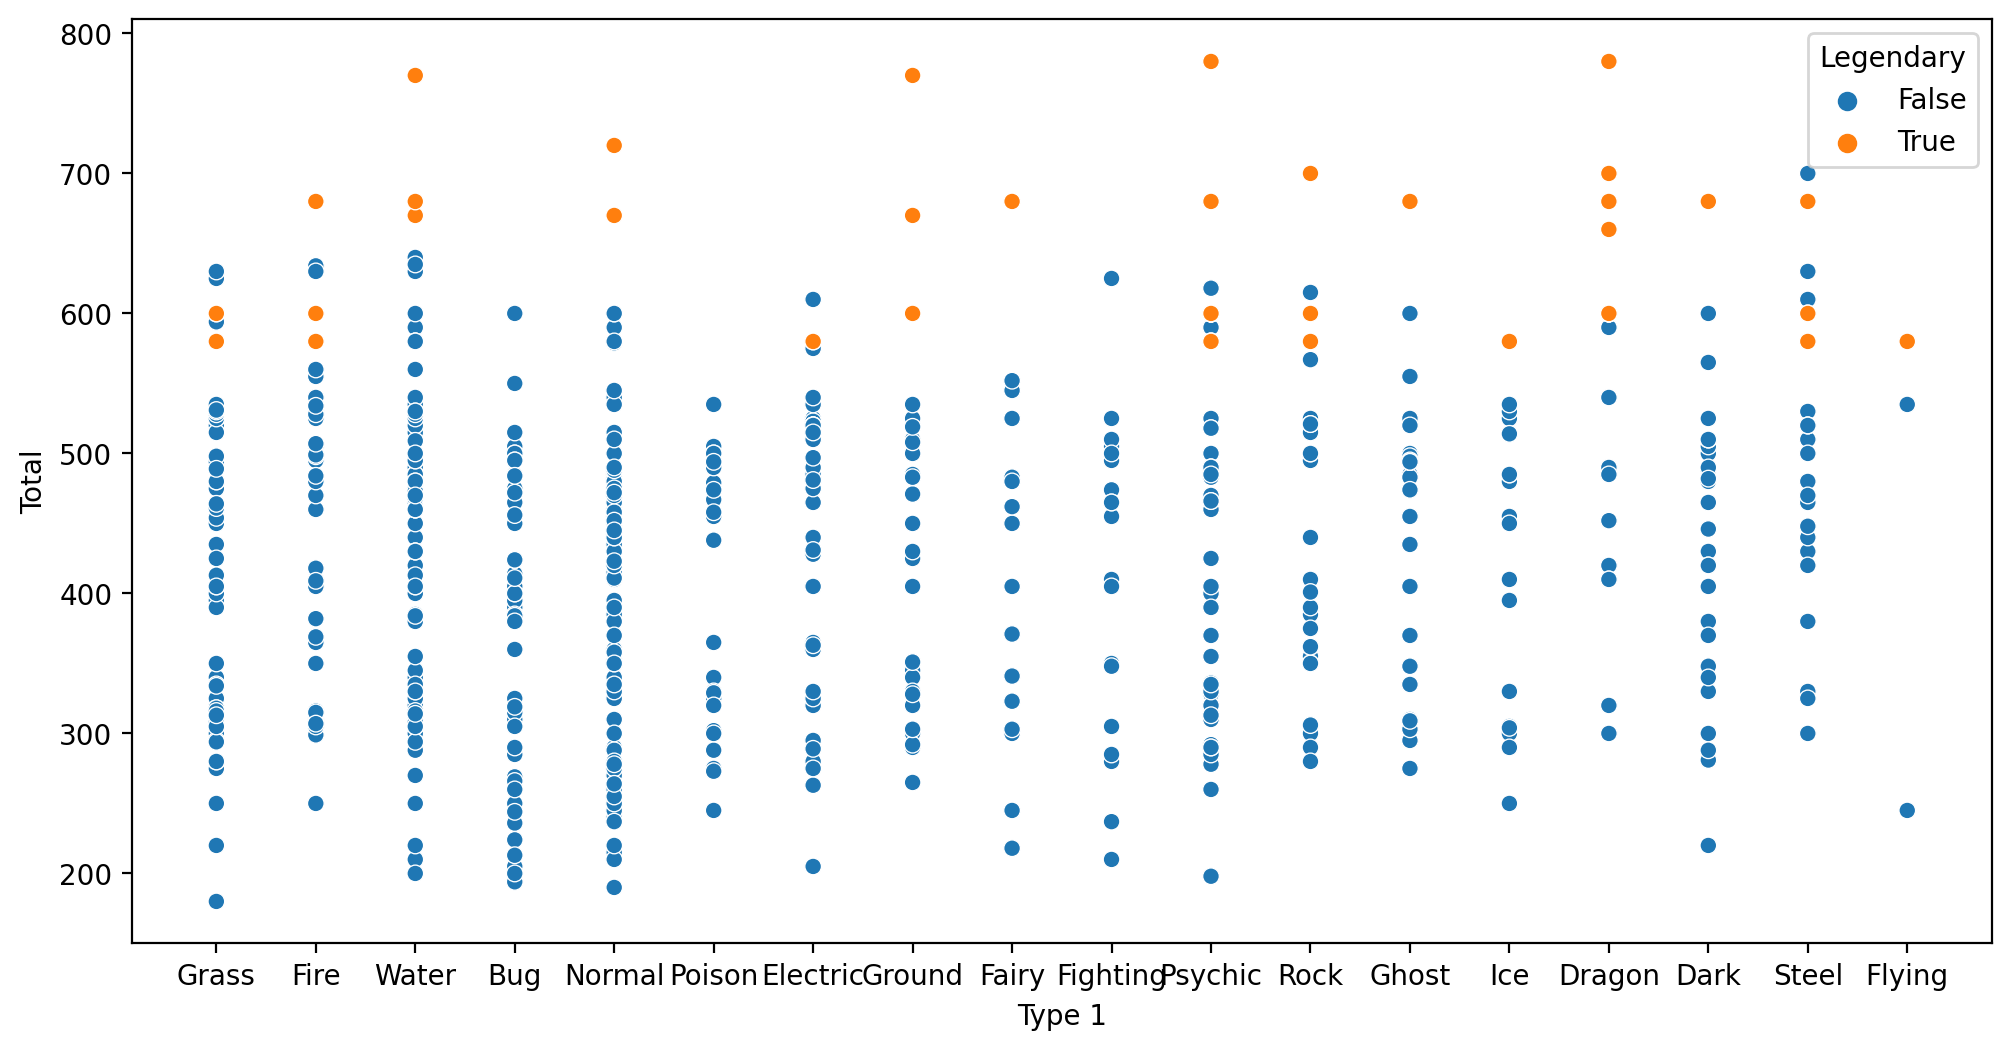

In [582]:
# Total 값에 따른 분포 plot (누가누가 쎈가)
# 주황색 점 = 전설, 전설이 상당 수 위에 있다 (강하다)
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=poketmon, x="Type 1", y="Total", hue="Legendary")
plt.show()

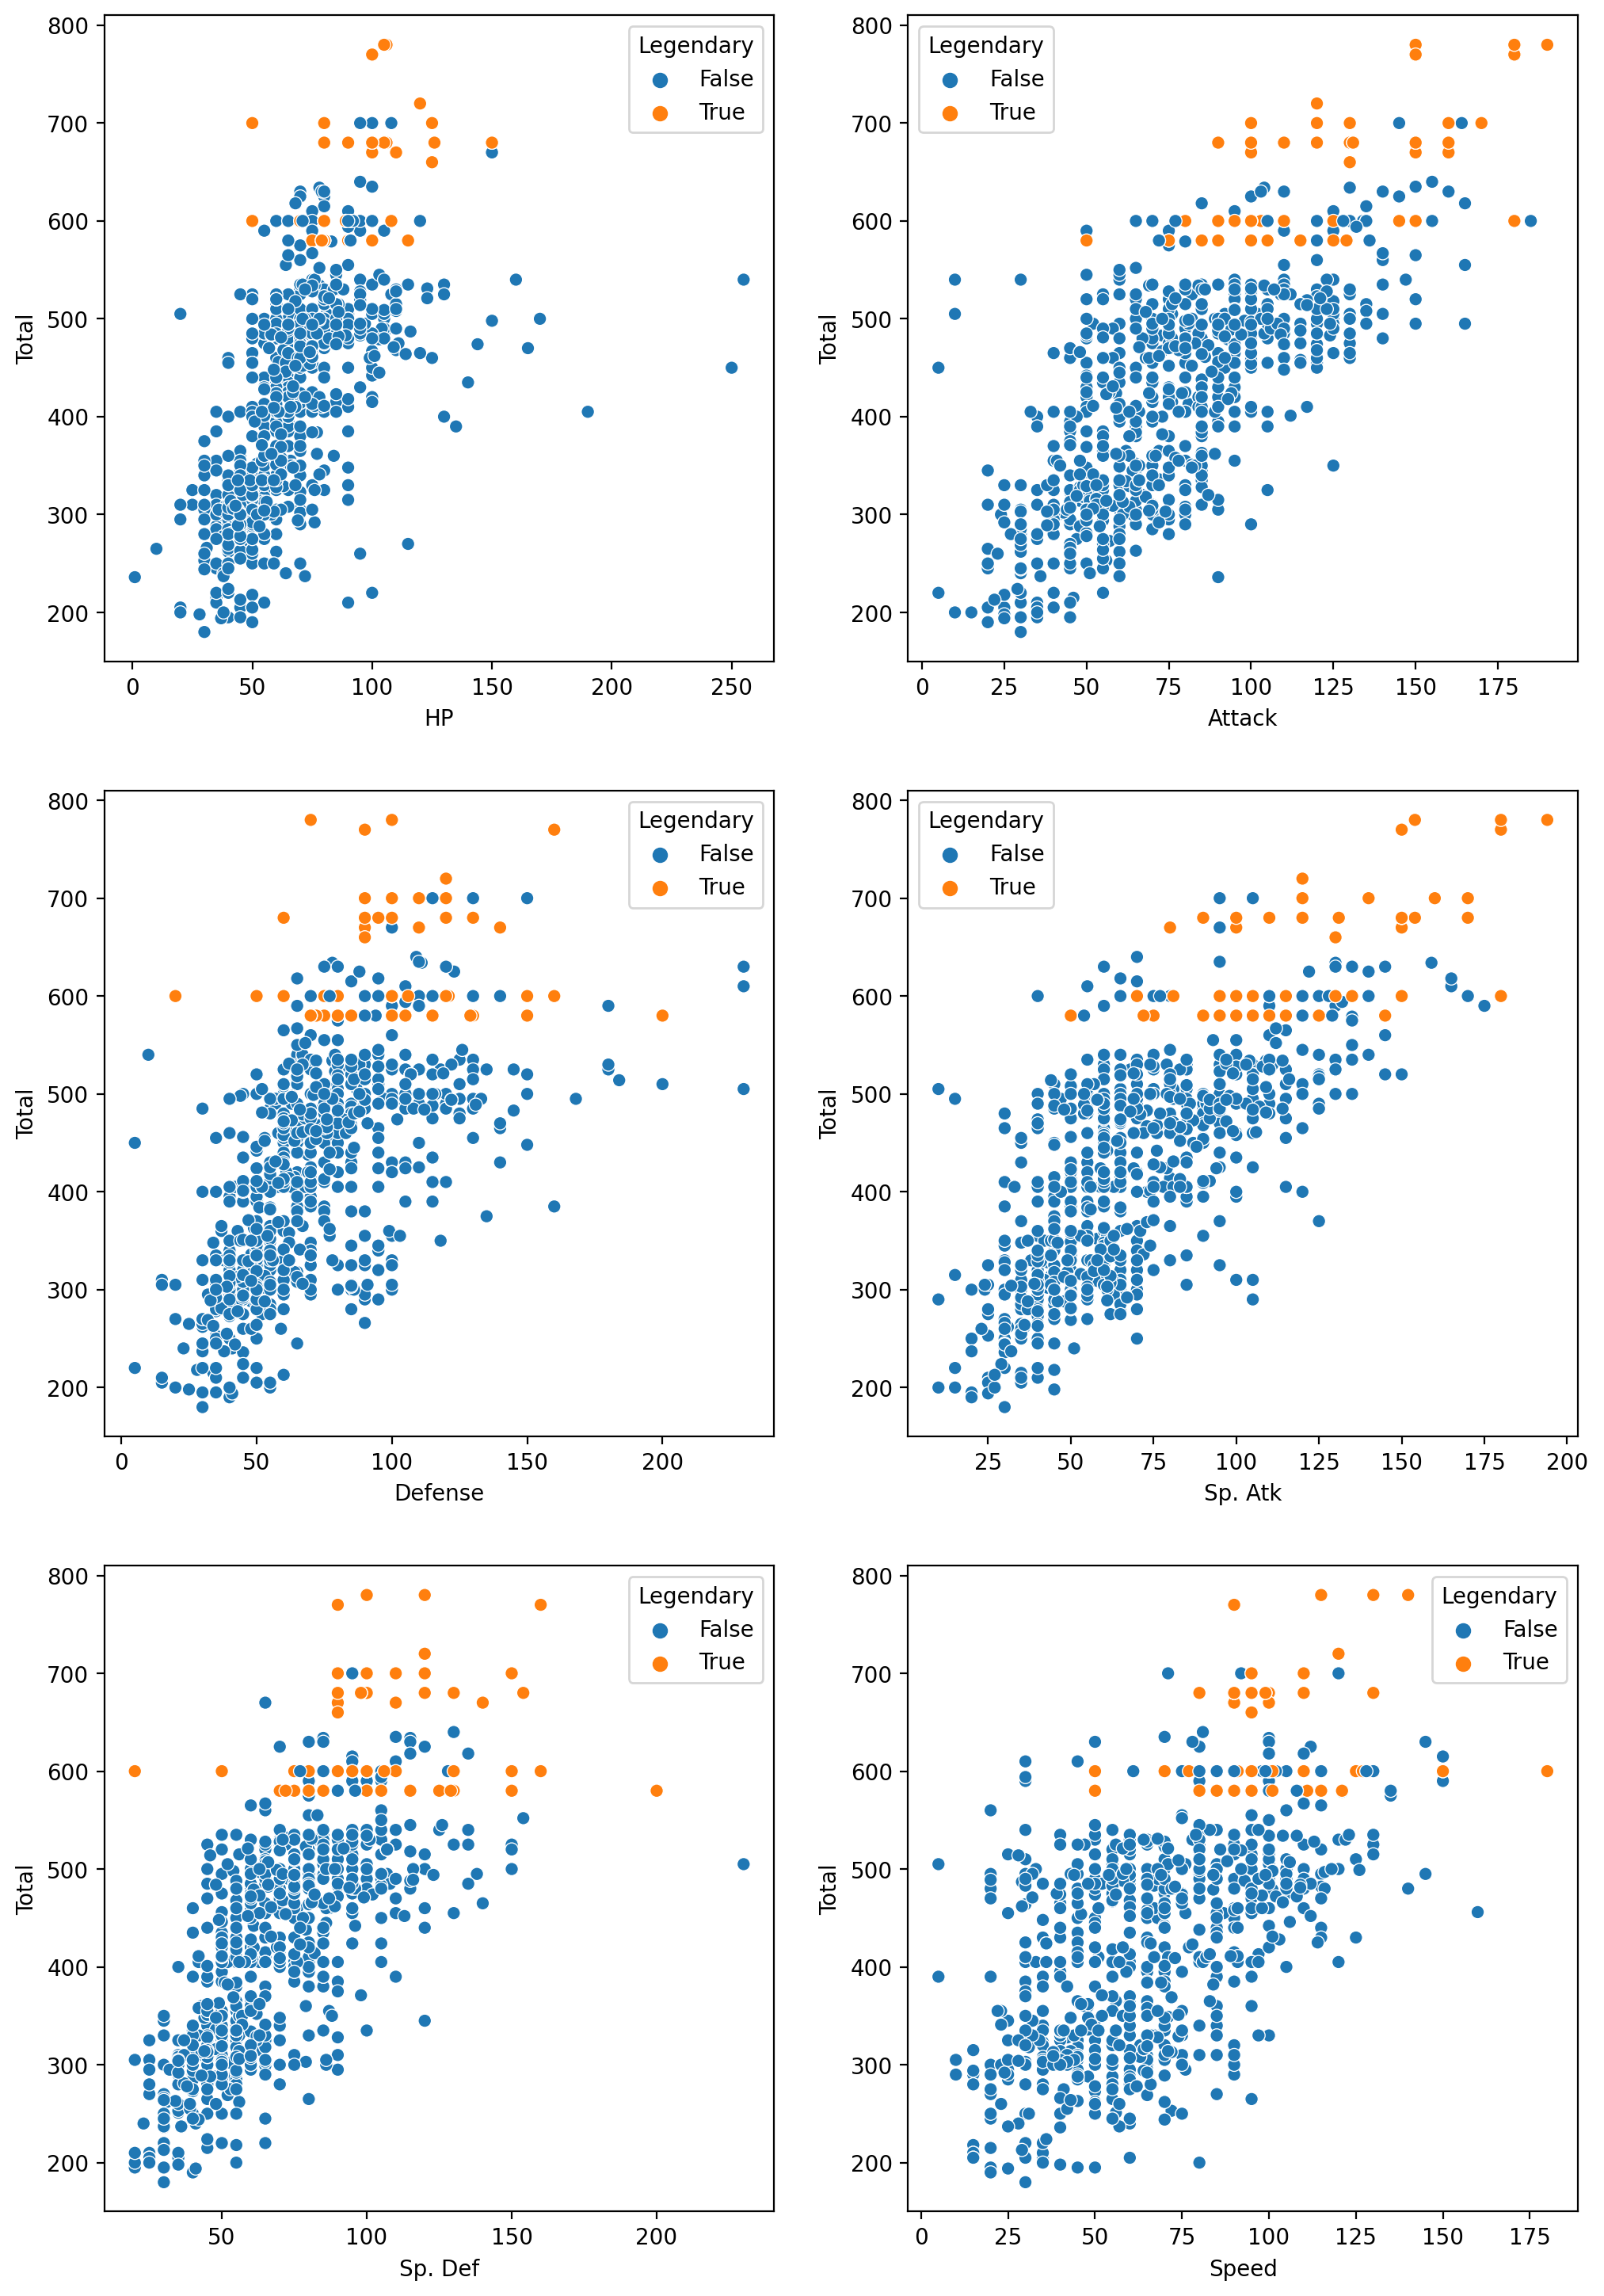

In [583]:
# 각 각의 스탯 plot
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)

# "HP" 스탯의 scatter plot
sns.scatterplot(data=poketmon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=poketmon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# # "Defense" 스탯의 scatter plot
sns.scatterplot(data=poketmon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=poketmon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=poketmon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=poketmon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

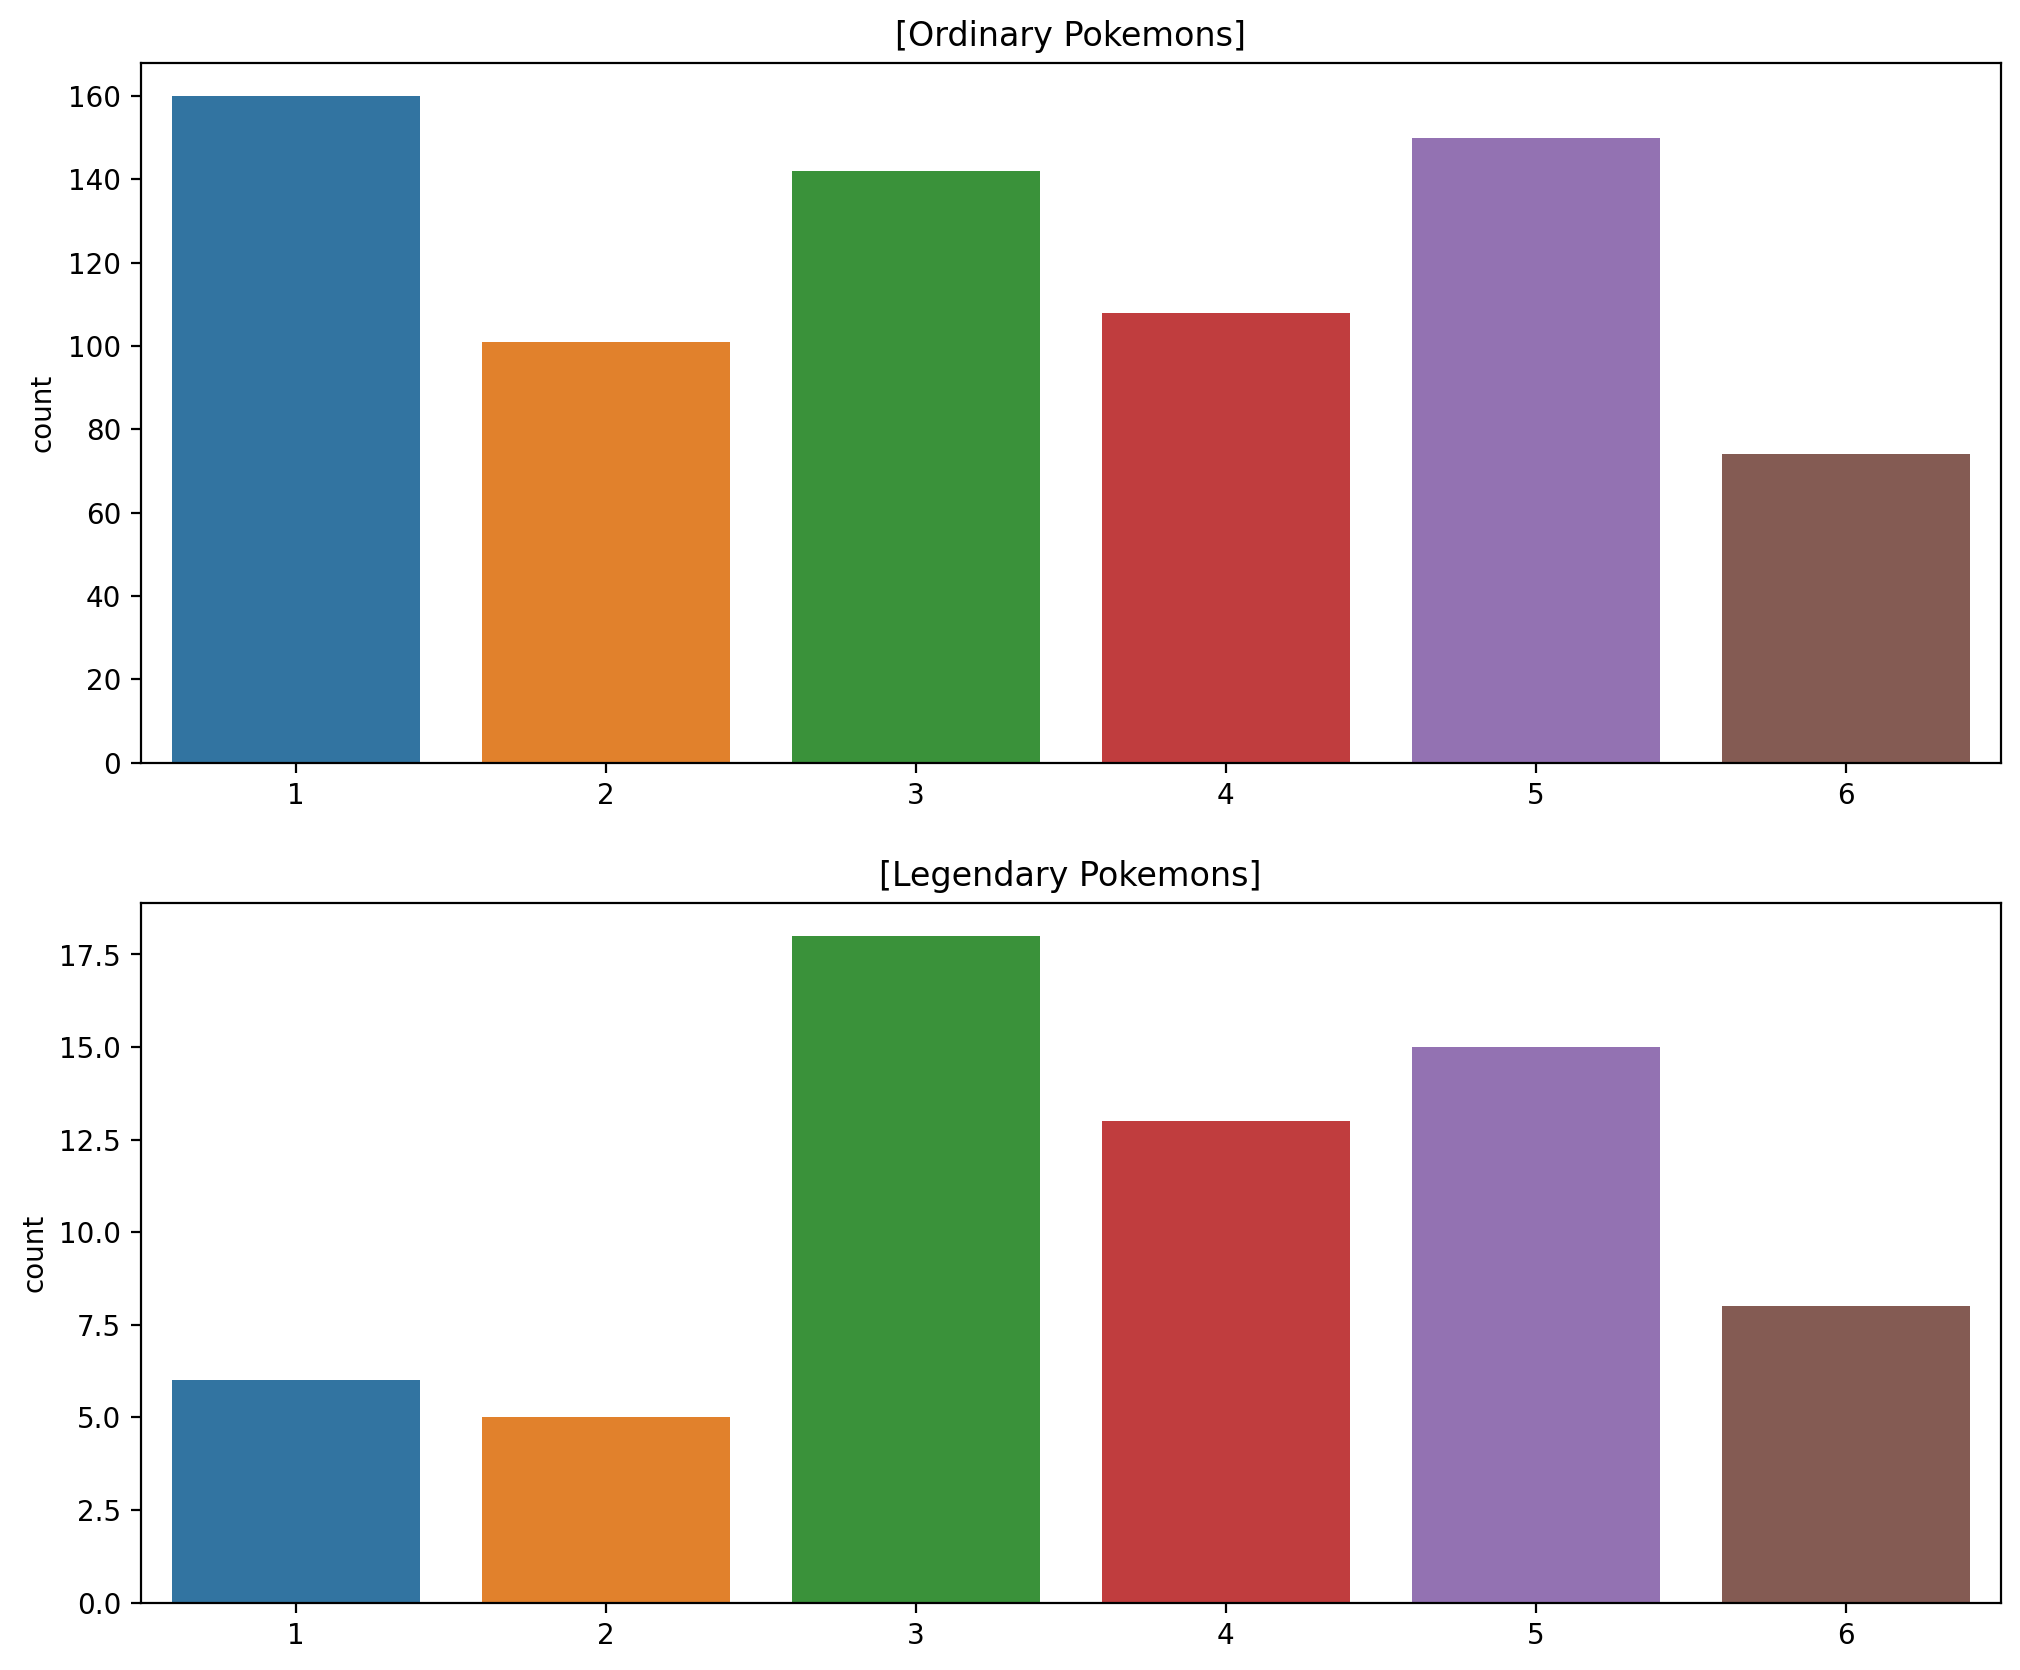

In [584]:
# Generation 포켓몬의 세대
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

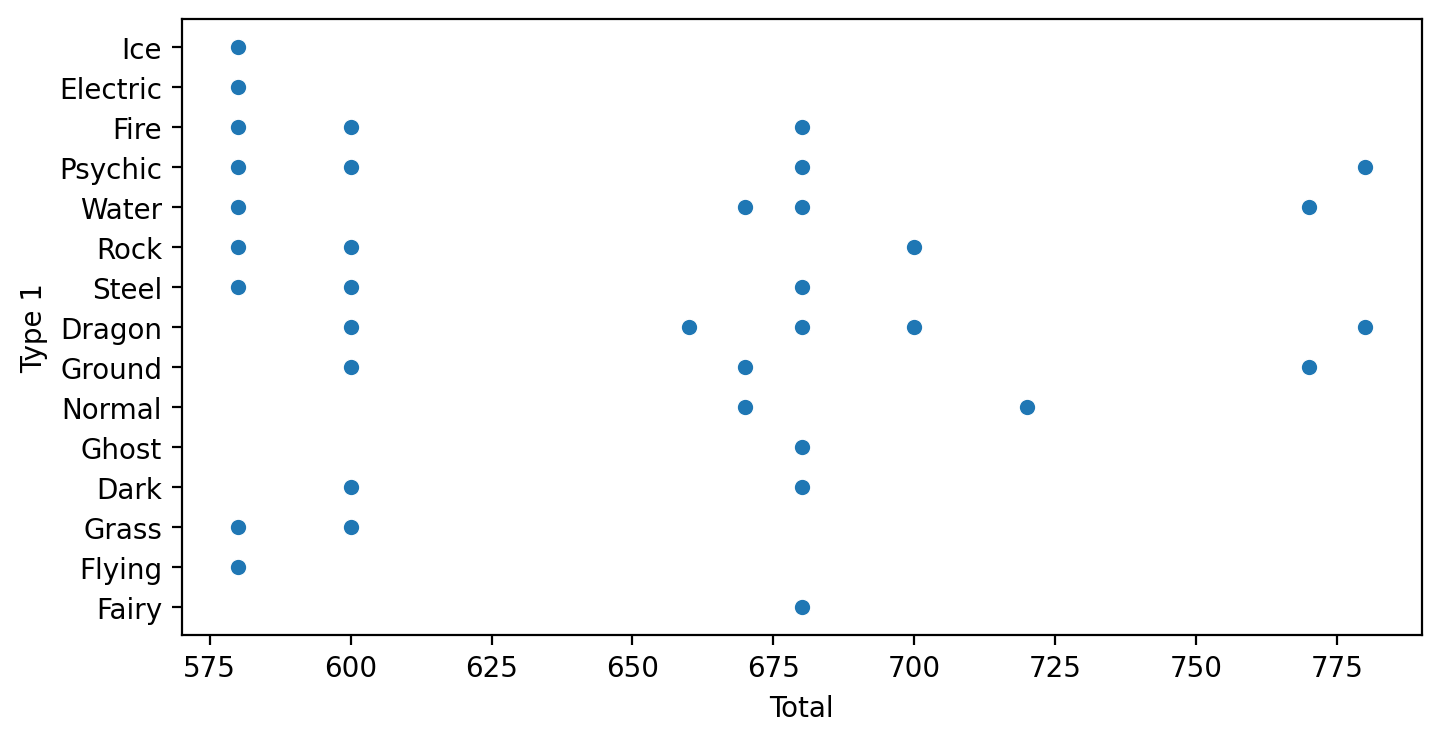

In [585]:
# 전설, 일반 분류해서 차이 확인하기
# 1. Total 값 : Total 값이 전설/일반 분류 예측에 영향이 있는 컬럼인지 확인을 위함
# 특정 값에 몰려있음 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [586]:
# Total 값들의 집합 확인
# 9가지 값 존재
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


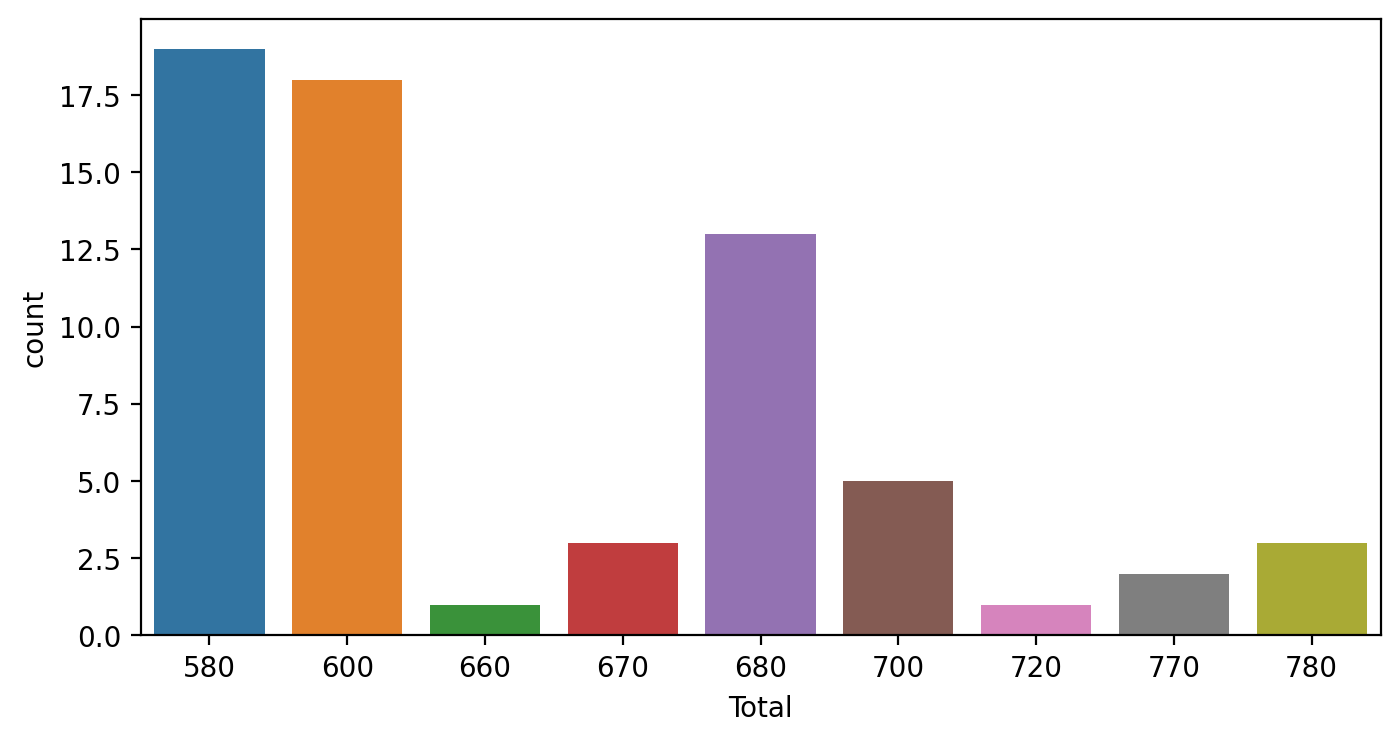

In [587]:
# 시각화
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [588]:
# 전설 포켓몬의 평균 Total 값
round(65 / 9, 2)

7.22

In [589]:
# oridinary Total 집합
# Total 값들의 집합 확인
# 많은 값 존재
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [590]:
# oridinary 집합의 크기
# 195개의 Total 값
print(len(sorted(list(set(ordinary["Total"])))))

195


In [591]:
# oridinary 평균 Total
round(735 / 195, 2)

3.77

In [592]:
# Name 컬럼도 영향이 있는지 확인해보기
# "MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem" 등
# 위 비슷한 단어가 포함되어 있음 확인
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [593]:
# Name에 forme 가 들어가는 전설 확인
# forme 들어간 전설 포켓몬이 많다는 것 확인
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [594]:
# Name 길이 : 분류에 영향을 줌
# 이름이 긴 경우도 전설일 경우가 많다
# name_count 피처 추가 하면서 이름 길이 추가
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [595]:
# 이름이 분류에 영향을 미친다
# name_count 피처 추가 하면서 이름 길이 추가
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


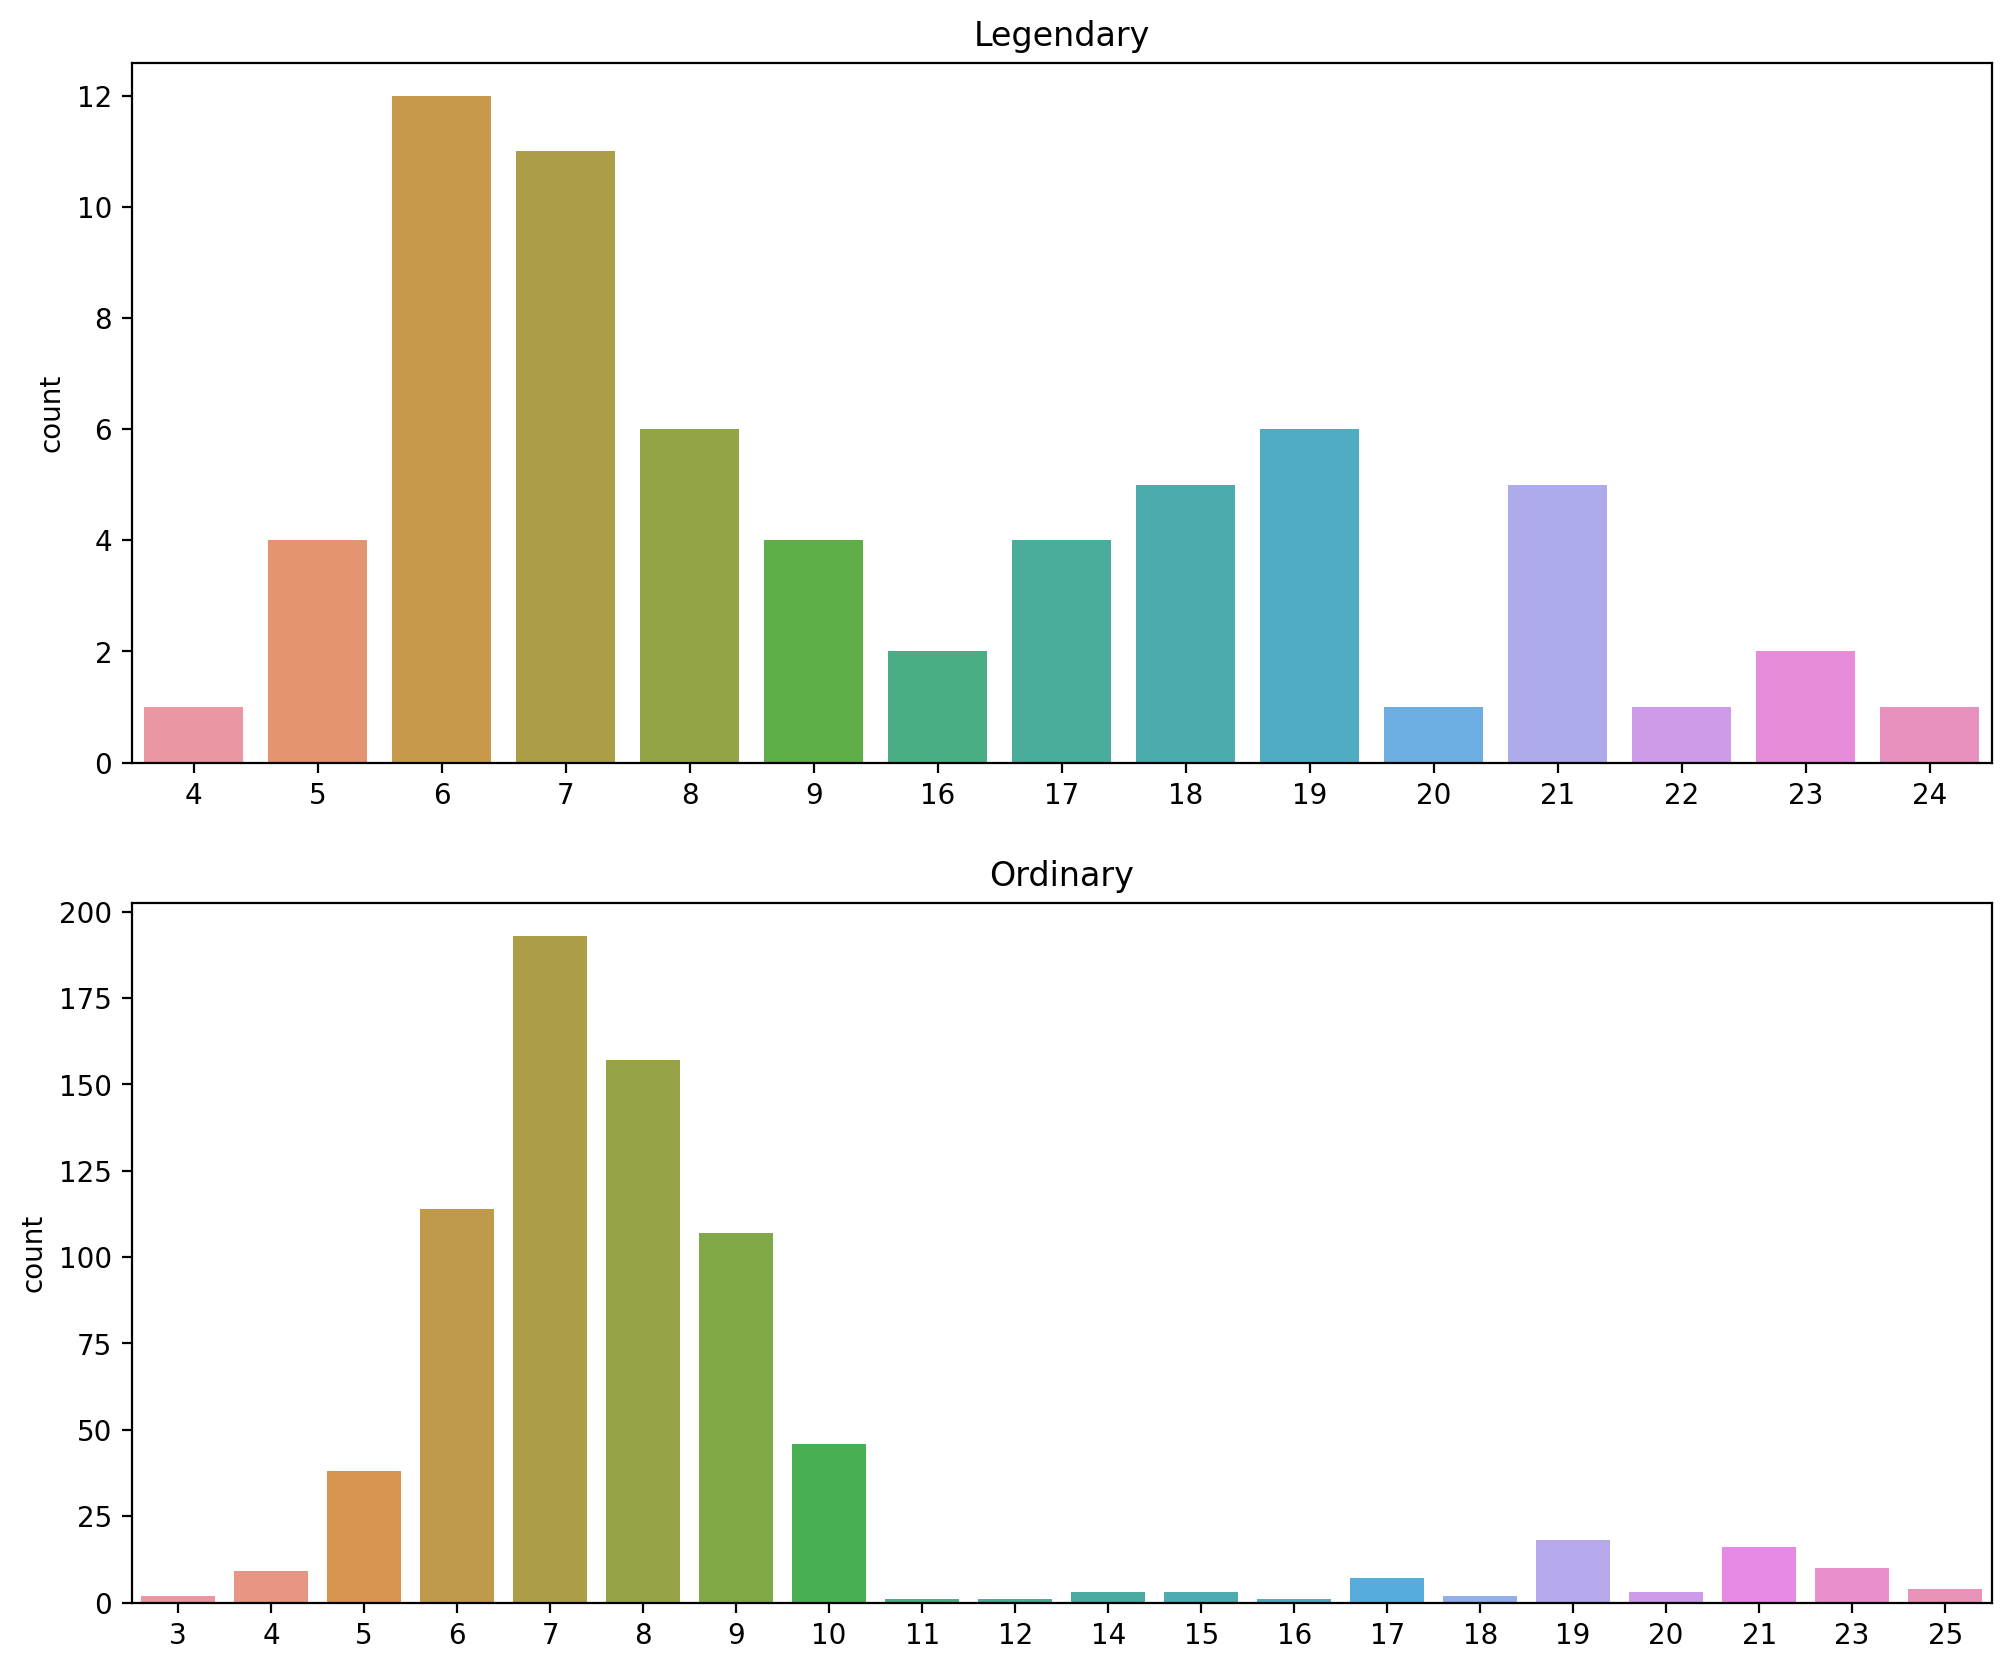

In [596]:
# name_count 컬럼의 특징 시각화

plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [597]:
# 전설 포켓몬이 10 이상의 이름을 갖는 경우가 많다 (확률 확인)
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [598]:
# 일반 포켓몬 10 이상의 길이 확률 확인
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


# **3. 데이터 전처리**
* 분류에 영향을 주는 데이터
1. Name (토큰화)
2. Total, stats
3. Type1 , 2(인코딩)

In [599]:
# 이름의 길이 전처리
# name_conut 길이가 10 위아래 categorical 컬럼 생성

poketmon["name_count"] = poketmon["Name"].apply(lambda i: len(i))
poketmon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [600]:
# 길이 10 기준 True, False 컬럼 생성
# name_count 컬럼 보다 유용할지는 알 수 없다
poketmon["long_name"] = poketmon["name_count"] >= 10
poketmon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [601]:
# Name 에 가장 많이 쓰이는 토큰 확인하고 새로운 컬럼 생성
# 알파벳이 아닌 문자를 포함하는 경우 : Zygarde50% Forme 경우가 있으니 전처리
# 띄어쓰기 전처리
poketmon["Name_nospace"] = poketmon["Name"].apply(lambda i: i.replace(" ", ""))
poketmon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [602]:
# 알파벳만 있는지 확인하고 컬럼 생성
poketmon["name_isalpha"] = poketmon["Name_nospace"].apply(lambda i: i.isalpha())
poketmon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [603]:
# 다른 문자 이름에 포함 확인 (name_isalpha == False)
# 9마리 존재 확인
print(poketmon[poketmon["name_isalpha"] == False].shape)
poketmon[poketmon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [604]:
# 9마리밖에 없으니 그냥 바꿔주자
# 이거 기호 기준으로 replace 사용 가능한지?
poketmon = poketmon.replace(to_replace="Nidoran♀", value="Nidoran X")
poketmon = poketmon.replace(to_replace="Nidoran♂", value="Nidoran Y")
poketmon = poketmon.replace(to_replace="Farfetch'd", value="Farfetchd")
poketmon = poketmon.replace(to_replace="Mr. Mime", value="Mr Mime")
poketmon = poketmon.replace(to_replace="Porygon2", value="Porygon Two")
poketmon = poketmon.replace(to_replace="Ho-oh", value="Ho Oh")
poketmon = poketmon.replace(to_replace="Mime Jr.", value="Mime Jr")
poketmon = poketmon.replace(to_replace="Porygon-Z", value="Porygon Z")
poketmon = poketmon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

poketmon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [605]:
# 전처리 한 것 체크
poketmon["name_isalpha"] = poketmon["Name_nospace"].apply(lambda i: i.isalpha())

# 다시 name_isalpha 값이 False인 포켓몬 확인
poketmon[poketmon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [606]:
# 띄어쓰기 & 대문자 기준으로 분리해서 토큰화
# 정규표현식(RegEx: Regular Expression) 기법 사용
import re

In [607]:
# 분리 시작
name = "CharizardMega Charizard X"

In [608]:
# 공백 기준으로 쪼개기
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [609]:
# name_split의 첫번째 인덱스 temp 저장
temp = name_split[0]
temp
# 대문자 자르기(토큰화)
# 첫글자가 대문자 분리 할때 유용한 정규표현식 '[A-Z][a-z]*'
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [610]:
# 위 3개의 과정을 for문으로 돌려 token화
# tokens 변수에 대문자 분리한 것 담기
# 위에 tokens 변수 안 겹치나?
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [611]:
# 토큰화를 모든 이름에 적용시킬 함수 생성
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        tokens.extend(re.findall('[A-Z][a-z]*', part_name))
    return np.array(tokens)

# 함수 작동 하는지 확인
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [612]:
# 전체 전설의 데이터셋에 적용
# 65개의 토큰수 확인(set은 중복x)
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [613]:
# 65개 중 최빈 토큰 추출
# collection 패키지 안에 Counter 사용 드디어!
from collections import Counter

In [614]:
# 가장 많은 요소 등장 횟수 정렬
# most_common
# Count(a).most_common()
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [615]:
# 전설몬 이름에 최빈도 토큰이 있는지 여부 컬럼 생성
# 이 부분은 왜 하는지 다시 한번 공부해보자
# True 값을 갖고 있으면 전설몬 확률이 높다라 판단!
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    poketmon[f"{token}"] = poketmon["Name"].str.contains(token)

poketmon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [616]:
# Type 1 & Type 2 전처리
# one-hot-Enconding
# Type 리스트 확인
print(types)

['Poison', 'Fire', 'Dark', 'Steel', 'Flying', 'Water', 'Normal', 'Bug', 'Psychic', 'Ground', 'Dragon', 'Grass', 'Electric', 'Fairy', 'Ghost', 'Rock', 'Ice', 'Fighting']


In [617]:
# one-hot-Enconding
for t in types:
    poketmon[t] = (poketmon["Type 1"] == t) | (poketmon["Type 2"] == t)

poketmon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Poison,Fire,Dark,Steel,Flying,Water,Normal,Bug,Psychic,Ground,Dragon,Grass,Electric,Fairy,Ghost,Rock,Ice,Fighting
0,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,Grass,Poison,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,Fire,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# **4. Baseline 모델 만들기**
* 모델의 성능 하한선을 제공

In [618]:
# 원본 데이터 호출
print(dataset.shape)
dataset.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [619]:
# 문자열을 빼줘야 해서 컬럼 확인
dataset.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [620]:
# target 컬럼과 의미없는 컬럼 '#'과 문자열 데이터 3개 빼고 사용
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [621]:
# target 데이터인 Legendary 변수 저장
target = 'Legendary'

In [622]:
# faeture 컬럼에 변수 X에 저장

X = dataset[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [623]:
# y 변수에 target 컬럼 저장
y = dataset[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [624]:
# 모델에 적용하기 위한 train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


# **5. 의사결정트리 모델 학습(baseline)**

In [625]:
# 모델 호출
from sklearn.tree import DecisionTreeClassifier

In [626]:
# 모델 설정
model = DecisionTreeClassifier(random_state=25)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [627]:
# 채점
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [628]:
# 위 과정은 일반몬의 비율이 많기 때문에 성능 평가가 의미가 없다(불균형 데이터)
# 다른 척도로 모델을 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



# **6. 전처리 데이터로 모델 학습**

In [629]:
# 몇가지 컬럼을 제외하고 사용할 컬럼만 추려 저장
# 이거 요약할 수 있는 코드 고민해볼까?
features2 = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features2)

38

In [630]:
# target 저장
target = "Legendary"
target

'Legendary'

In [631]:
# 전처리 한 데이터 저장
x = poketmon[features2]
print(X.shape)
x.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [632]:
# y에 target 저장
y = poketmon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [633]:
# 전처리한 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [634]:
# 전처리 데이터로 의사결정트리에 다시 학습
model = DecisionTreeClassifier(random_state=25)

In [635]:
# train으로 학습하고 test 데이터로 예측값
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [636]:
# 채점
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[141,   6],
       [  1,  12]])

In [637]:
# classification report 확인
# recall 값 0.62 > 0.92로 상승

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



# **회고록**

1. 추가로 고민해보고 싶은 점
* 중복된 데이터에서 해당 데이터 찾는 방법 ('#'컬럼에서 6번 리자몽 찾은 것)
* 'Name' 컬럼에 다른 문자 들어간 데이터, 컬럼에서 기호 기준으로 대체 코드 방법 (9개 데이터 하나씩 직접 대체)
* 전처리 한 컬럼명 하나씩 입력 않고 자동으로 리스트화 할 수 있는 방법

2. 느낀점
* 머신러닝(분류 모델)에 전체적인 구조를 이해할 수 있었고 할 수록 EDA와 전처리에 많은 시간과 노력을 투자 해야 된다고 느꼈습니다. 교과서다 생각하고 계속 숙지할 예정 입니다!
아직 분석과 전처리 부분은 많이 모자르지만 많은 데이터를 접하고 이용해보면 몇가지 중요 피처들을 위한 전처리들은 외워질 것 같습니다.
모델 학습과 채점도 간단하게 할 수 있는 방법을 배워 좋았습니다.

* 17~20번 후반 노드에서 전처리 전/후 모델 성능을 눈으로 보면서 **EDA&전처리** 중요성을 한번 더 느끼게 되었습니다

3. 아쉬운 점
* 시각화 부분에서 그래프 해석과 피벗 테이블 해석이 다른 부분의 원인을 찾지 못해서 아쉬웠습니다.